<a href="https://colab.research.google.com/github/jingchenqin/1st-Repo/blob/master/midterm_EDA_consolidation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import json
from pprint import pprint
import pandas as pd
import time
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
import time

# **Introducation**
**For this analysis, our target audience are museum curators and acquisition strategists.**  
This analysis aims to provide curators with a comprehensive overview of the current collection's composition to inform future acquisition strategies by pinpointing under-represented areas and aid exhibition planning by highlighting gallery-ready items.

# Import Data From API


In [ ]:
response = requests.get(
    "https://api.artic.edu/api/v1/artworks",
    params={"limit": 0}
)
total_records = response.json()['pagination']['total']
print("Total artworks:", total_records)

Total artworks: 130023


In [ ]:
pprint(response.status_code )

200


In [ ]:
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
}

In [ ]:
limit = 100
total_pages = total_records // limit
sample_pages = random.sample(range(1, total_pages + 1), 100)  # 100 pages × 100 = 10,000 artworks

In [ ]:
headers = {"User-Agent": "Mozilla/5.0"}
all_artworks = []

for page in sample_pages:
    params = {
        "limit": limit,
        "page": page,
        "fields": (
            "id,title,artist_title,place_of_origin,date_start,date_end,"
            "fiscal_year,artwork_type_title,department_title,classification_title,"
            "medium_display,style_title,colorfulness,is_public_domain,is_on_view,gallery_title"
        )
    }
    r = requests.get("https://api.artic.edu/api/v1/artworks", headers=headers, params=params)
    if r.status_code == 200:
        all_artworks.extend(r.json().get("data", []))
    time.sleep(0.2)
print(f"Finished fetching. Total artworks collected: {len(all_artworks)}")

Finished fetching. Total artworks collected: 10000


In [ ]:
for r in response.json():
    print(r) #print first level keys

pagination
data
info
config


Because the Art Institute of Chicago API is paginated and restricts access to a maximum of 10,000 records per query, it is not possible to download the museum’s entire collection directly through the API. Each API request returns data in pages, with up to 100 records per page, and any combination of limit and page parameters that would exceed 10,000 total records is rejected by the server.

To work within this constraint, we implemented a random sampling approach. Specifically, we randomly selected 100 pages—each containing up to 100 artworks—from the total number of available pages, producing a dataset of approximately 10,000 artworks. Randomizing the page selection ensures that every artwork in the collection has an equal probability of being included, despite the pagination limit.  
This approach allows us to conduct analyses that generalize to the broader dataset while remaining compliant with the API’s technical and performance restrictions. The resulting sample provides a representative cross-section of the museum’s holdings, suitable for exploring overall trends such as artistic periods, mediums, geographic origins, and collection characteristics.

In [ ]:
aw = pd.json_normalize(all_artworks)

# checks for data quality


In [ ]:
aw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10000 non-null  int64  
 1   title                 10000 non-null  object 
 2   date_start            9790 non-null   float64
 3   date_end              9790 non-null   float64
 4   place_of_origin       9596 non-null   object 
 5   medium_display        9918 non-null   object 
 6   fiscal_year           6668 non-null   float64
 7   is_public_domain      10000 non-null  bool   
 8   colorfulness          9431 non-null   float64
 9   is_on_view            10000 non-null  bool   
 10  gallery_title         447 non-null    object 
 11  artwork_type_title    9979 non-null   object 
 12  department_title      9996 non-null   object 
 13  artist_title          9004 non-null   object 
 14  style_title           2956 non-null   object 
 15  classification_title

In [ ]:
aw.head()

,id,title,date_start,date_end,place_of_origin,medium_display,fiscal_year,is_public_domain,colorfulness,is_on_view,gallery_title,artwork_type_title,department_title,artist_title,style_title,classification_title
0,90072,Comfort to the Corns,1800.0,1800.0,England,Hand-colored etching on ivory wove paper,1931.0,True,35.6721,False,None,Print,Prints and Drawings,James Gillray,None,etching
1,90069,The Consultation or Last Hope,1808.0,1808.0,England,Hand-colored etching on ivory wove paper,1931.0,True,37.8954,False,None,Print,Prints and Drawings,Thomas Rowlandson,None,etching
2,90068,Sons of Neptune Shaving a Landsman!,1817.0,1817.0,England,Hand-colored etching on paper,1931.0,True,33.5248,False,None,Print,Prints and Drawings,Isaac Cruikshank,None,etching
3,90067,The Logierian System,1818.0,1818.0,England,Hand-colored etching on paper,1931.0,True,30.8790,False,None,Print,Prints and Drawings,George Cruikshank,None,etching
4,90066,The Cow-Pock- or- The Wonderful Effects of the...,1802.0,1802.0,England,Etching with hand-coloring on cream wove paper,1931.0,True,41.7746,False,None,Print,Prints and Drawings,James Gillray,None,etching


In [ ]:
aw.tail()

,id,title,date_start,date_end,place_of_origin,medium_display,fiscal_year,is_public_domain,colorfulness,is_on_view,gallery_title,artwork_type_title,department_title,artist_title,style_title,classification_title
9995,38633,Vulcan's Isle,1962.0,1962.0,United States,"Etching, roulette, aquatint, and scraping in l...",NaN,False,73.7920,False,None,Print,Prints and Drawings,Letterio Calapai,None,etching
9996,34563,Medusa,1969.0,1969.0,United States,"Etching and aquatint in blue, yellow, green, a...",1971.0,False,24.9960,False,None,Print,Prints and Drawings,Letterio Calapai,None,etching
9997,130953,Calaveras locas por la música (Calaveras Crazy...,1938.0,1938.0,Mexico,Lithograph in black on tan wove paper,1945.0,False,17.4622,False,None,Print,Prints and Drawings,"Taller de Gráfica Popular (Mexico City, Mexico)",None,lithograph
9998,130951,Calaveras locas por la música (Calaveras Crazy...,1938.0,1938.0,Mexico,Lithograph in black on paper,1945.0,False,17.4622,False,None,Print,Prints and Drawings,"Taller de Gráfica Popular (Mexico City, Mexico)",None,lithograph
9999,130950,Calaveras locas por la música (Calaveras Crazy...,1938.0,1938.0,Mexico,Lithograph in red (recto) and black (verso) on...,1945.0,False,73.6375,False,None,Print,Prints and Drawings,"Taller de Gráfica Popular (Mexico City, Mexico)",None,lithograph


In [ ]:
aw.describe()

,id,date_start,date_end,fiscal_year,colorfulness
count,10000.000000,9.790000e+03,9.790000e+03,6668.000000,9431.000000
mean,128211.059500,1.968736e+03,1.988371e+03,1981.103779,19.815591
std,80496.653665,1.500923e+04,1.500846e+04,35.262206,17.778638
min,74.000000,-1.450000e+03,-1.200000e+03,1920.000000,0.000000
25%,59136.500000,1.790000e+03,1.800000e+03,1943.000000,7.329850
50%,119838.500000,1.900000e+03,1.912000e+03,1991.000000,16.141200
75%,199144.250000,1.960000e+03,1.963000e+03,2012.000000,27.951100
max,279930.000000,1.486490e+06,1.486490e+06,2025.000000,153.572600


In [ ]:
#it is impossible to have date_start and date_end of e+06, so there must be some data entry error we need to deal with
# Create a mask to find rows where date_start is 2025 or later
impossible_dates_mask = aw['date_start'] >= 2025
# Print how many we found
print(f"Found {impossible_dates_mask.sum()} artworks with impossible future dates.")

Found 2 artworks with impossible future dates.


In [ ]:
# Use .loc to set both date_start and date_end to NA for those rows
aw.loc[impossible_dates_mask, ['date_start', 'date_end']] = np.nan

In [ ]:
# Create a mask to find rows where date_end is before date_start
logical_error_mask = (aw['date_end'] < aw['date_start']) & (aw['date_start'].notna())
# Print how many we found
print(f"Found {logical_error_mask.sum()} artworks where date_end is before date_start.")

Found 0 artworks where date_end is before date_start.


In [ ]:
# so there is no logical date error found

In [ ]:
# check for missing data
# Get the sum of null values for each column
missing_values = aw.isnull().sum()

# Sort them from most to least
print(missing_values.sort_values(ascending=False))

gallery_title           9553
style_title             7044
fiscal_year             3332
artist_title             996
colorfulness             569
place_of_origin          404
classification_title     355
date_end                 212
date_start               212
medium_display            82
artwork_type_title        21
department_title           4
is_public_domain           0
id                         0
title                      0
is_on_view                 0
dtype: int64


In [ ]:
aw['is_on_view'].value_counts()

,count
is_on_view,
False,9553
True,447


gallery_title: This is the most-missing field but it makes perfect sense; most of the collection is not on view, so it has no gallery title.  

style_title: Over 50% missing. This is a significant gap. It means "style" is not a well-cataloged field and may be unreliable for a full analysis.

fiscal_year: This is a large gap, potentially due to missing infomation for early year acquisition

artist_title: more than 10% of artworks are missing an artist.


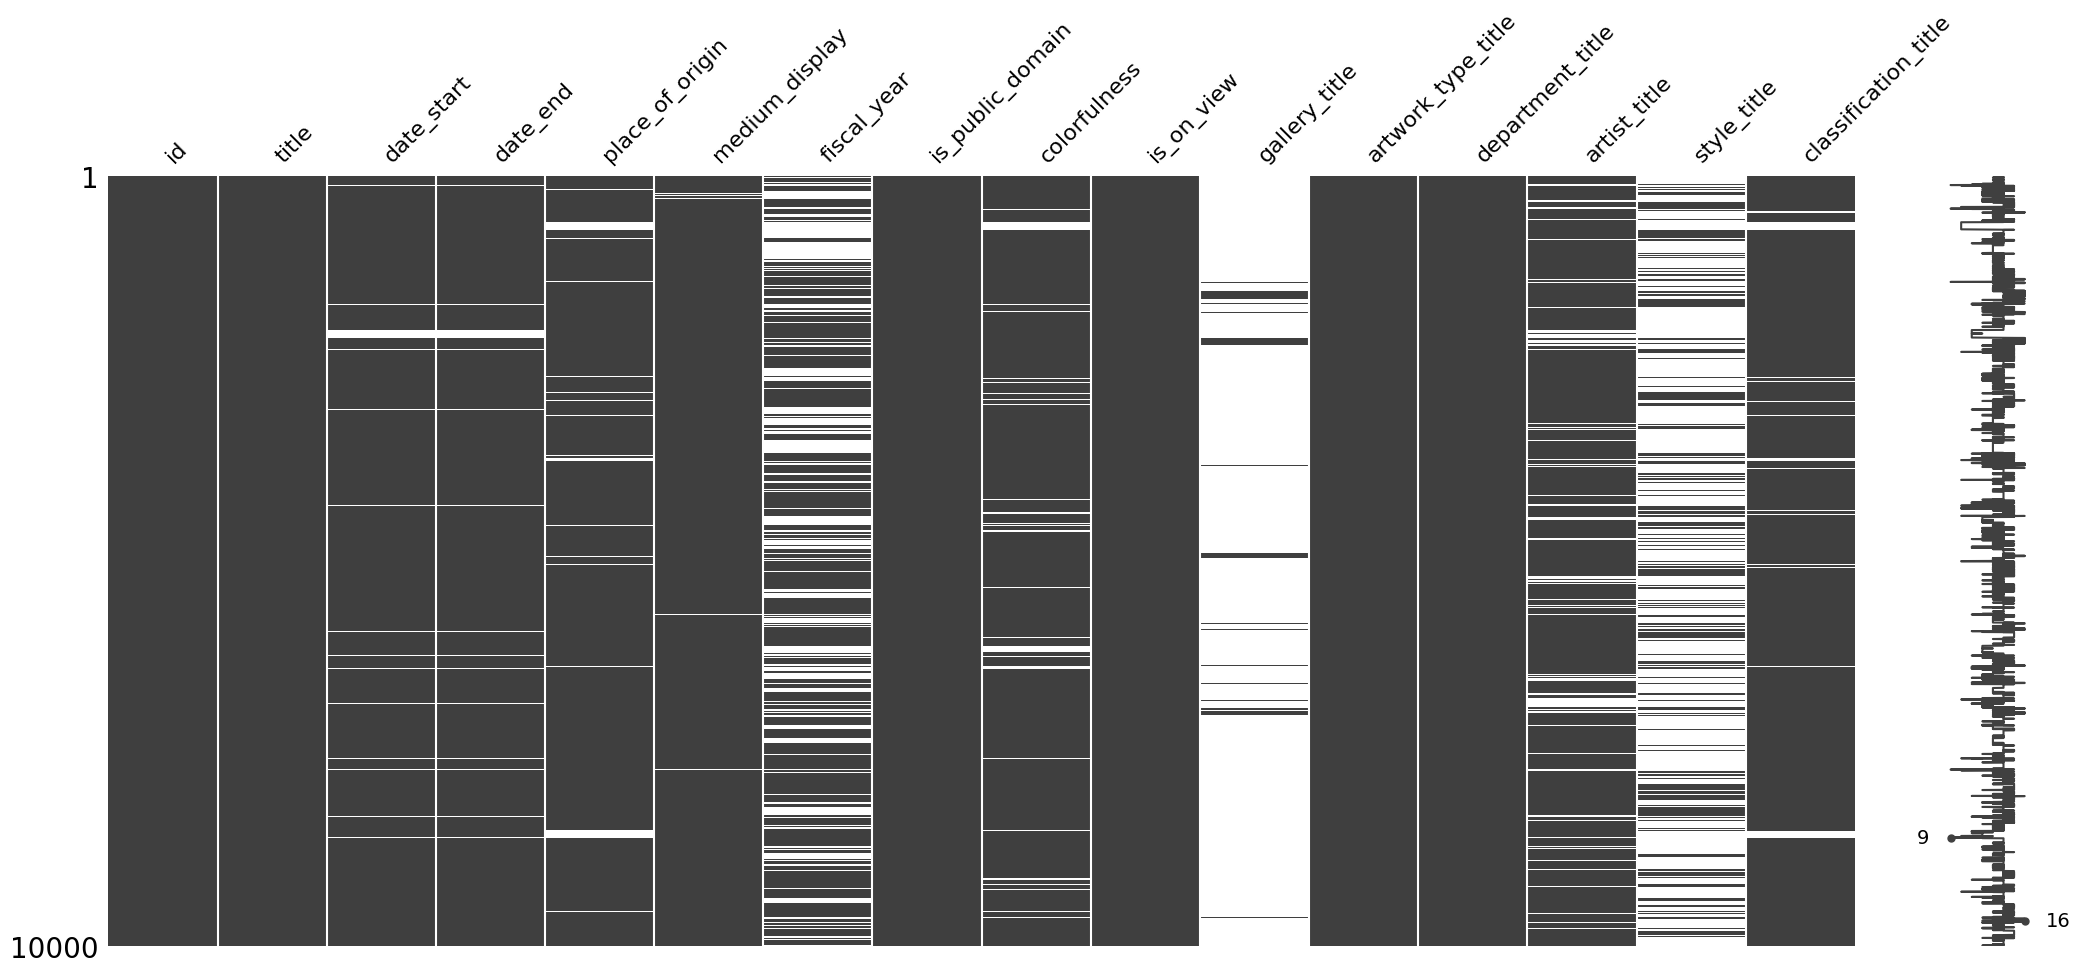

In [ ]:
# Plot a matrix of missing data
# missingno create a data-dense display showing the presence (gray) and absence (white) of data points across columns and rows, including a sparkline summarizing row-wise completeness.
msno.matrix(aw)
plt.show()

**Core Columns are Reliable:** Your most important columns for analysis are in great shape. id, title, date_start, date_end, fiscal_year, is_on_view, artwork_type_title, and department_title are all fully (or almost fully) populated. This gives you a strong foundation for your analysis.  
**Highlights "Context-Specific" Columns:** The gallery_title column is almost entirely empty. This isn't an error. It logically confirms that this column is only populated for the small fraction of artworks that are currently is_on_view.  
**Missingness is Not Random:** The small chart on the right shows "missingness correlations." It indicates that when artist_title is missing, place_of_origin and style_title are often missing too. This makes perfect sense: if the museum doesn't know the artist, it's very likely they don't know their origin or the art style.

In [ ]:
aw.isnull().mean().sort_values(ascending=False).head(10)  # % missing


,0
gallery_title,0.9553
style_title,0.7044
fiscal_year,0.3332
artist_title,0.0996
colorfulness,0.0569
place_of_origin,0.0404
classification_title,0.0355
date_end,0.0212
date_start,0.0212
medium_display,0.0082


In [ ]:
# Fill missing categorical data
aw['artist_title'] = aw['artist_title'].fillna('Unknown')
aw['place_of_origin'] = aw['place_of_origin'].fillna('Not Recorded')
aw['medium_display'] = aw['medium_display'].fillna('Not Recorded')
aw['classification_title'] = aw['classification_title'].fillna('Not Recorded')
aw['style_title'] = aw['style_title'].fillna('Not Recorded')

In [ ]:
# grouping to check for contradictions
aw['department_title'].value_counts()

,count
department_title,
Prints and Drawings,4287
Photography and Media,1598
Arts of Asia,1147
Textiles,769
Applied Arts of Europe,602
Architecture and Design,591
Arts of the Americas,370
Painting and Sculpture of Europe,192
Contemporary Art,153


In [ ]:
departments = aw['department_title'].value_counts().index

# Loop through each of the departments
for dept in departments:
    print(f"\nArtworks in Department: '{dept}'")

    # Create a mini-DataFrame containing only that department
    dept_df = aw[aw['department_title'] == dept]

    # Get the value_counts() of artwork types *within that group*
    type_counts = dept_df['artwork_type_title'].value_counts()

    print(type_counts)


Artworks in Department: 'Prints and Drawings'
artwork_type_title
Print                     3002
Drawing and Watercolor    1265
Book                        19
Name: count, dtype: int64

Artworks in Department: 'Photography and Media'
artwork_type_title
Photograph          1561
Print                 18
Graphic Design         5
Mixed Media            4
Sculpture              2
Book                   2
Time Based Media       2
Name: count, dtype: int64

Artworks in Department: 'Arts of Asia'
artwork_type_title
Print                      785
Book                       140
Vessel                     118
Painting                    31
Decorative Arts             18
Sculpture                   13
Ceramics                     9
Architectural fragment       9
Funerary Object              2
Drawing and Watercolor       2
Religious/Ritual Object      1
Photograph                   1
Textile                      1
Furniture                    1
Name: count, dtype: int64

Artworks in Department: 'T

We performed a cross-validation by grouping curatorial departments against their artwork types. The analysis shows a very high degree of data validity, indicating the museum's categorization is logical and consistent.  
We noted a few minor outliers, such as 'Prints' in the 'Photography and Media' department. These are likely conceptual art pieces where the medium is secondary to the idea, so they are grouped with contemporary media.

# Interesting and relevant EDA
## 1. date_start trend
We examine the date_start variable to understand the temporal distribution of artworks, which offers valuable insight into the museum’s historical coverage.

Saved 'date_start_histogram_full.png'


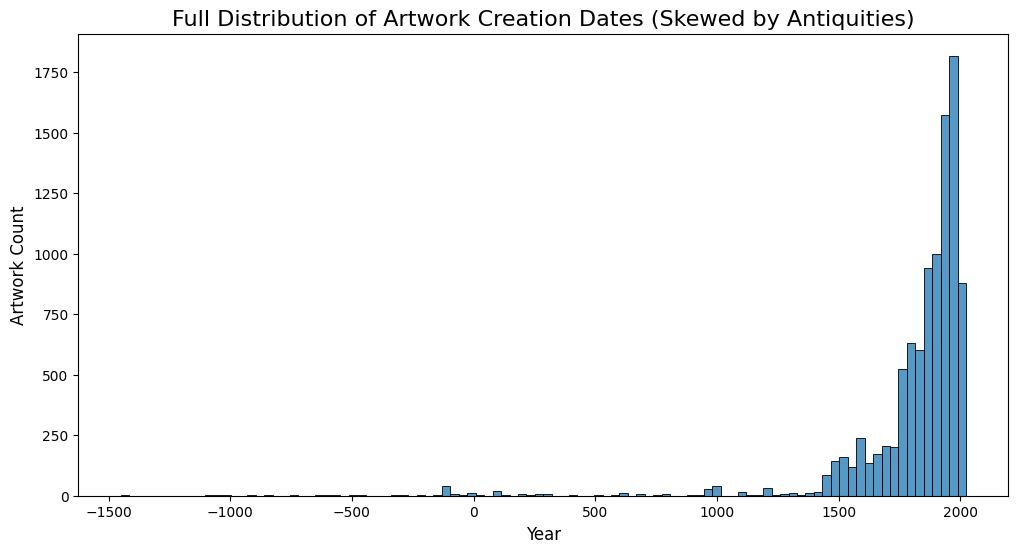

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(aw['date_start'], bins=100)
plt.title('Full Distribution of Artwork Creation Dates (Skewed by Antiquities)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Artwork Count', fontsize=12)
plt.savefig('date_start_histogram_full.png')
print("Saved 'date_start_histogram_full.png'")

The initial histogram of the date_start column not quite readable because its x-axis is dramatically skewed by negative outliers, which compresses all of the relevant data from the 16th to 21st centuries.
We shall zoom in to see detailed date-related patern

Saved 'date_start_histogram_antiquities.png'


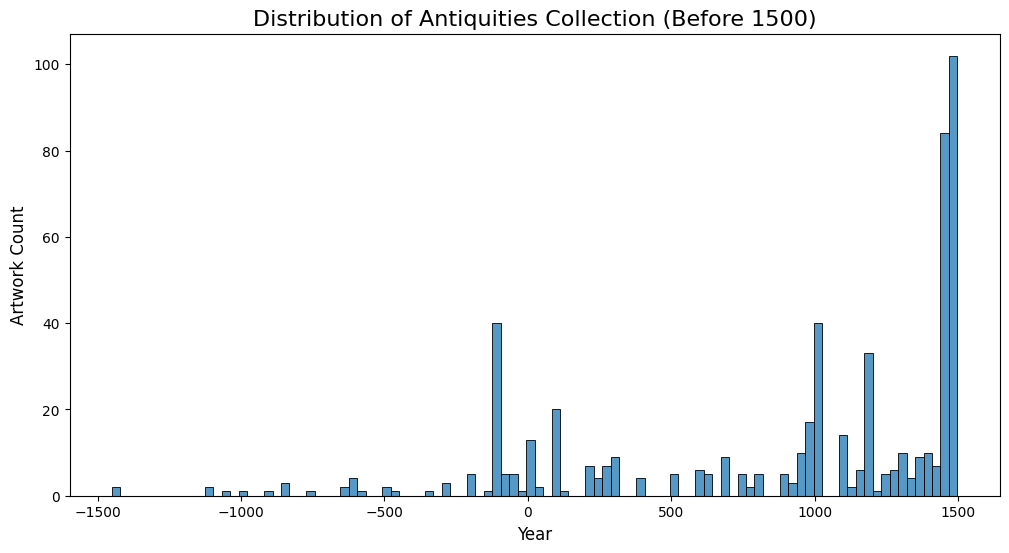

In [ ]:
#Filter for artworks created before the year 1500
aw_antiquities = aw[aw['date_start'] < 1500]

plt.figure(figsize=(12, 6))
# We use more bins here to see the detail
sns.histplot(aw_antiquities['date_start'], bins=100)
plt.title('Distribution of Antiquities Collection (Before 1500)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Artwork Count', fontsize=12)
plt.savefig('date_start_histogram_antiquities.png')
print("Saved 'date_start_histogram_antiquities.png'")

In [ ]:
# Now, get the counts of each unique date
repeated_dates = aw_antiquities['date_start'].value_counts()

# Print the 20 most frequent dates
print("--- Most Frequent 'date_start' Values (Before 1500) ---")
print(repeated_dates.head(20))

--- Most Frequent 'date_start' Values (Before 1500) ---
date_start
 1450.0    62
-100.0     40
 1000.0    39
 1200.0    26
 1475.0    20
 101.0     17
 969.0     17
 1480.0    16
 1.0       12
 1470.0    10
 1100.0    10
 1490.0     9
 960.0      9
 1496.0     8
 301.0      8
 1495.0     7
 201.0      6
 700.0      6
 1300.0     6
 1201.0     6
Name: count, dtype: int64


For Antiquities (Before 1500): The data is "dirty" and behaves like a categorical column. The most common entries are not exact years but placeholder "bins" (e.g., -100.0 for "1st Century BC," 1.0 for "1st Century AD," 101.0 for "2nd Century AD"). Use feature engineering to turn these numbers into meaningful category "century_groups".

In [ ]:
# Define the bins and labels for our new column.
# These are based on the placeholder values we found (e.g., -100, 1, 101, 301...)
bins = [
    -float('inf'), -2001, -1501, -1001, -501,
    -1,
    499, 999, 1499
]
# Define labels that match these new 500-year bins
labels = [
    "Before 2000 BC",
    "2000-1501 BC",
    "1500-1001 BC",
    "1000-501 BC",
    "500-1 BC",
    "1 AD - 499 AD",
    "500 AD - 999 AD",
    "1000 AD - 1499 AD"
]

# Create the New Feature
aw_antiquities['period_group'] = pd.cut(aw_antiquities['date_start'],
                                        bins=bins,
                                        labels=labels,
                                        right=True)

/tmp/ipython-input-3299247408.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aw_antiquities['period_group'] = pd.cut(aw_antiquities['date_start'],


In [ ]:
aw_antiquities['period_group'].value_counts()

,count
period_group,
1000 AD - 1499 AD,333
500 AD - 999 AD,72
1 AD - 499 AD,67
500-1 BC,64
1000-501 BC,13
1500-1001 BC,5
Before 2000 BC,0
2000-1501 BC,0


Plotting 'century_group' value counts...


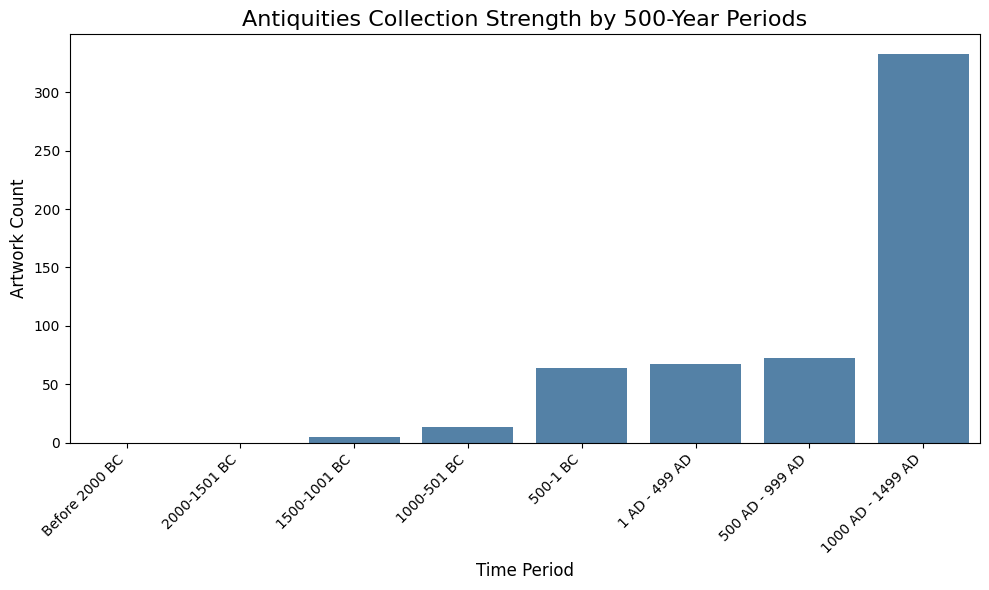

In [ ]:
print("Plotting 'century_group' value counts...")
plt.figure(figsize=(10, 6))

sns.countplot(
    x='period_group',
    data=aw_antiquities,
    order=labels,  # Order the x-axis chronologically
    color='steelblue' # Use a single color for a cleaner look
)

plt.title('Antiquities Collection Strength by 500-Year Periods', fontsize=16)
plt.xlabel('Time Period', fontsize=12)
plt.ylabel('Artwork Count', fontsize=12)

# Rotate labels for readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

**Dominant Core Strength:** The collection's overwhelming strength is concentrated in the medieval period of "1000 AD - 1499 AD"    
This plot shows a clear increasing trend over time. The collection is weakest in the BC periods and steadily grows from "1 AD - 499 AD"  to "500 AD - 999 AD" , culminating in its largest peak in the "1000 AD - 1499 AD" period.

Saved 'date_start_histogram_modern.png'


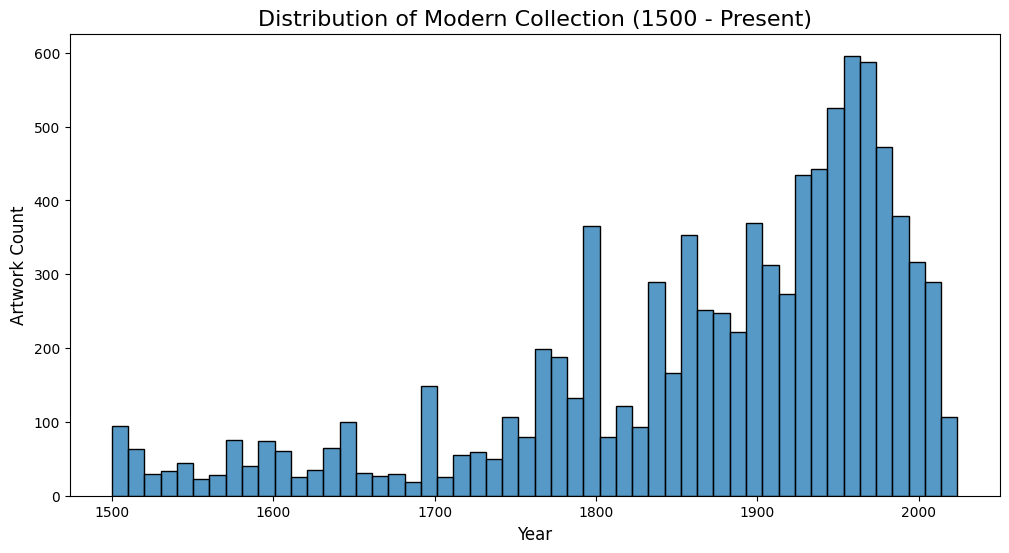

In [ ]:
# Filter for artworks created on or after the year 1500
aw_modern = aw[aw['date_start'] >= 1500]

# Calculate bins, one for each decade
start_year = 1500
end_year = 2025
bin_count = int((end_year - start_year) / 10) # 1 bin per decade

plt.figure(figsize=(12, 6))
sns.histplot(aw_modern['date_start'], bins=bin_count)
plt.title('Distribution of Modern Collection (1500 - Present)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Artwork Count', fontsize=12)
plt.savefig('date_start_histogram_modern.png')
print("Saved 'date_start_histogram_modern.png'")

In [ ]:
# get the counts of each unique date
repeated_dates_after = aw_modern['date_start'].value_counts()

# Print the 20 most frequent dates
print("--- Most Frequent 'date_start' Values (After 1500) ---")
print(repeated_dates_after.head(20))

--- Most Frequent 'date_start' Values (After 1500) ---
date_start
1972.0    124
1801.0    124
1960.0    119
1840.0    106
1963.0     98
1941.0     91
1949.0     91
1700.0     88
1900.0     85
1946.0     81
1973.0     77
1928.0     76
2003.0     76
1875.0     74
1800.0     72
1959.0     72
1835.0     72
1950.0     71
1976.0     71
1912.0     71
Name: count, dtype: int64


**Data Quality For the Modern Era (After 1500):** The data appears to be high-quality and numeric. The most common entries are specific, significant years (e.g., 1971, 1857, 1830). These spikes are likely real, reflecting major acquisitions or prolific periods. A histogram binned by decade is the perfect way to see these trends without losing this important detail.

**Findings**
**Primary Strength in Late 20th Century:** The collection's single largest strength is overwhelmingly concentrated in the mid-to-late 20th century (approx. 1950-1980). The peak around 1970 is the highest point in the entire 500-year span.  
**Weakness in Early Modern Era:** The collection is weak in the early modern period. There are very few items from 1500 to 1700, representing a clear gap in Renaissance and Baroque art.  
**Accelerated Growth:** The plot clearly shows that the creation (or acquisition) of art in the collection accelerated dramatically in the 19th century and then exploded in the 20th century.

## 2. artwork types
We examine the artwork types—not only their distribution and counts, but also their relationship with the fiscal year of acquisition and the proportion of works currently on view across different types.

In [ ]:
print(aw['artwork_type_title'].value_counts())

artwork_type_title
Print                      3811
Photograph                 1616
Drawing and Watercolor     1291
Textile                     642
Architectural Drawing       409
Glass                       301
Ceramics                    297
Book                        255
Vessel                      204
Painting                    194
Costume and Accessories     169
Metalwork                   126
Sculpture                   113
Furniture                    96
Decorative Arts              85
Graphic Design               83
Film, Video, New Media       49
Design                       37
Medals                       36
Miniature Painting           35
Coin                         31
Architectural fragment       20
Religious/Ritual Object      14
Arms                         12
Time Based Media              9
Armor                         8
Mixed Media                   7
Furnishings                   7
Installation                  6
Coverings and Hangings        5
Model                

<Axes: title={'center': 'Artworks by Type'}, xlabel='artwork_type_title'>

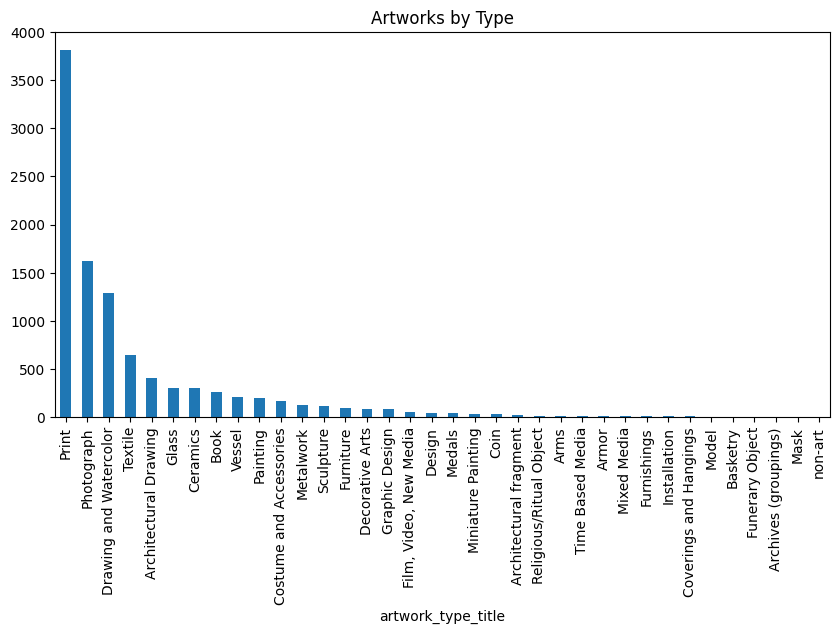

In [ ]:
aw['artwork_type_title'].value_counts().plot(kind='bar', title='Artworks by Type', figsize=(10,5))

AIC's collection is overwhelmingly dominated by Prints.  
Firstly, we explore the relationship between arttypes and the acquisition fiscal years.

<Axes: title={'center': 'Number of artworks acquired per year'}, xlabel='fiscal_year'>

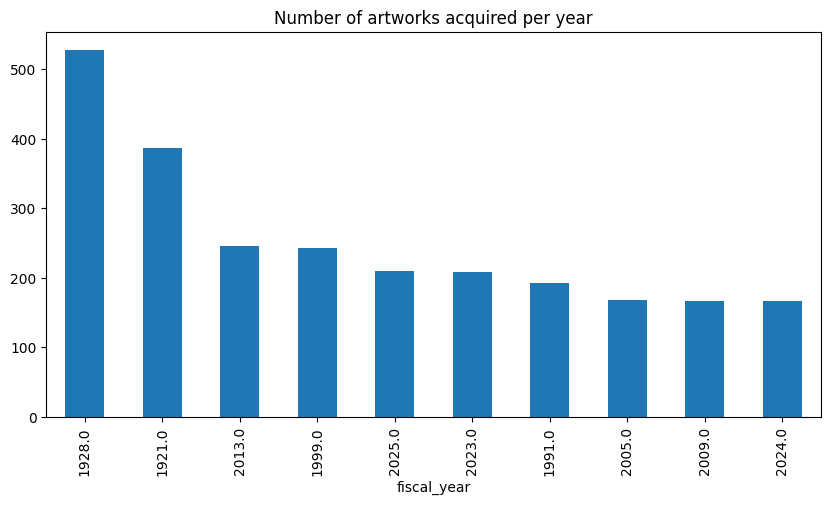

In [ ]:
aw['fiscal_year'].value_counts().head(10).plot(kind='bar', title='Number of artworks acquired per year', figsize=(10,5))

<Axes: title={'center': 'Number of Print artworks acquired per year'}, xlabel='fiscal_year'>

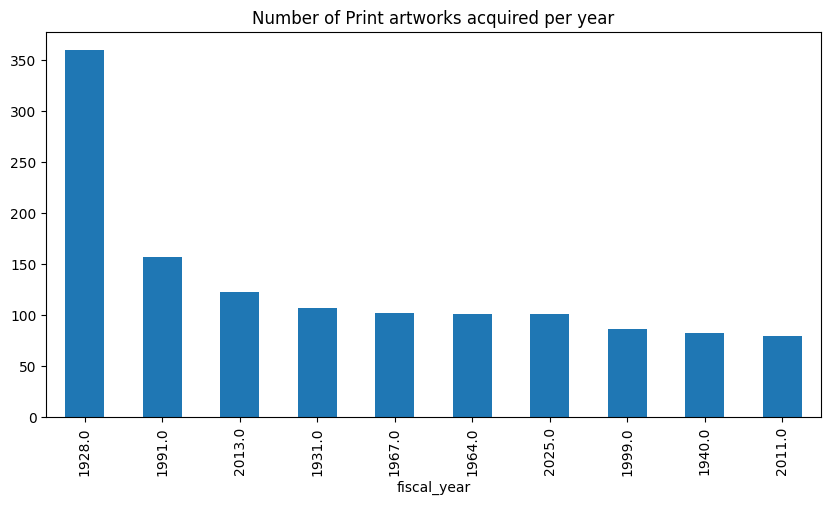

In [ ]:
aw[aw['artwork_type_title'] == 'Print']['fiscal_year'].value_counts().head(10).plot(kind='bar', title='Number of Print artworks acquired per year', figsize=(10,5))

Fromt ther two plots above, the single biggest year for total acquisitions is also the single biggest year for print acquisitions. We wanted to dive in to examine the proportion of prints in the total number of artworks acquired during years with higher artwork acquired volumes.

In [ ]:
# total artworks per year
total_per_year = aw.groupby('fiscal_year').size().rename('total_artwork_count')

# only Print artworks per year
print_per_year = aw[aw['artwork_type_title'].str.casefold() == 'print'] \
                   .groupby('fiscal_year').size().rename('print_count')

# merge into a single table
print_df = pd.concat([print_per_year, total_per_year], axis=1).fillna(0)

# calculate percent
print_df['total_artwork_pct'] = print_df['print_count'] / print_df['total_artwork_count']

# sort by total artworks descending
print_df = print_df.sort_values('total_artwork_count', ascending=False)

print_df.head(10)

,print_count,total_artwork_count,total_artwork_pct
fiscal_year,,,
1928.0,360.0,527,0.683112
1921.0,1.0,387,0.002584
2013.0,123.0,246,0.500000
1999.0,86.0,243,0.353909
2025.0,101.0,210,0.480952
2023.0,52.0,208,0.250000
1991.0,157.0,192,0.817708
2005.0,77.0,168,0.458333
2009.0,34.0,166,0.204819


The museum's "biggest" acquisition years (in terms of total items) are not all the same. Deeper investigation shows two fundamentally different types of growth events. First are "print-driven" years, such as 1928, where print acquisitions accounted for over 50% of all new items, suggesting large, focused donations or portfolio acquisitions. In stark contrast are "diversified" growth years, which saw almost zero print acquisitions. This proves the museum's collection expands through two parallel streams: massive, department-specific donations (like Prints) and large, broad-based acquisitions driven by other curatorial areas.  

Secondly, we will analyze how artwork types relate to their on_view status.

In [ ]:
grouped_tt=aw.groupby('artwork_type_title')
grouped_tt

In [ ]:
on_view_summary = pd.DataFrame({
    'total_artworks': grouped_tt['title'].count(),
     'on_view_artworks': grouped_tt['is_on_view'].sum()
})
on_view_summary['on_view_ratio'] = on_view_summary['on_view_artworks'] / on_view_summary['total_artworks']
on_view_summary.sort_values(by='on_view_ratio', ascending=False)

,total_artworks,on_view_artworks,on_view_ratio
artwork_type_title,,,
Armor,8,8,1.000000
Arms,12,12,1.000000
Furnishings,7,4,0.571429
Painting,194,98,0.505155
Furniture,96,46,0.479167
Metalwork,126,43,0.341270
Sculpture,113,32,0.283186
Decorative Arts,85,17,0.200000
Installation,6,1,0.166667


Our analysis of the on-view status by artwork type reveals a clear distinction between pieces intended for public display and those maintained primarily for research and preservation. Three-dimensional and decorative objects, such as armors, vessels and design-oriented works, tend to appear on view more often—reflecting their visual appeal and suitability for gallery presentation. In contrast, works on paper, including prints, photographs, and drawings, are rarely displayed, consistent with conservation requirements and their role as study collections. Archival and reference materials, such as books and documents, are almost exclusively kept off view, highlighting the museum’s strategy of balancing public exhibition with long-term preservation and scholarly access.

## 3. Artist
now I want to know for the past 10 years, what are the most popular artists with the most pieces of arts acquired by the AIC

In [ ]:
# Filter the DataFrame for fiscal years between 2015 and 2025
recent_artworks = aw[(aw['fiscal_year'] >= 2015) & (aw['fiscal_year'] <= 2025)]

# Get the value counts for 'artist_title' and display the top artists
most_popular_artists = recent_artworks['artist_title'].value_counts().reset_index()
most_popular_artists.columns = ['artist_title', 'count']

# Find the most popular fiscal year and place of origin for each artist
most_popular_info_per_artist = recent_artworks.groupby('artist_title').agg({
    'fiscal_year': lambda x: x.mode()[0] if not x.mode().empty else None,
    'place_of_origin': lambda x: x.mode()[0] if not x.mode().empty else None
}).reset_index()

most_popular_info_per_artist.columns = ['artist_title', 'most_popular_fiscal_year', 'most_popular_place_of_origin']

# Merge the two dataframes
most_popular_artists = pd.merge(most_popular_artists, most_popular_info_per_artist, on='artist_title')

print("Most popular artists, their most popular fiscal year, and place of origin between 2015 and 2025:")
display(most_popular_artists.head(10))

Most popular artists, their most popular fiscal year, and place of origin between 2015 and 2025:


,artist_title,count,most_popular_fiscal_year,most_popular_place_of_origin
0,Unknown,153,2023.0,Japan
1,Frida Escobedo,47,2021.0,Mexico
2,Barbara Rossi,29,2024.0,United States
3,Hans Bol,24,2023.0,Flanders
4,Rafael Gamo,24,2021.0,United States
5,David Levinthal,21,2018.0,United States
6,Carol Jackson,19,2016.0,United States
7,Theodore Roszak,19,2015.0,United States
8,Gordon Parks,19,2015.0,United States
9,Saul Steinberg,17,2025.0,United States


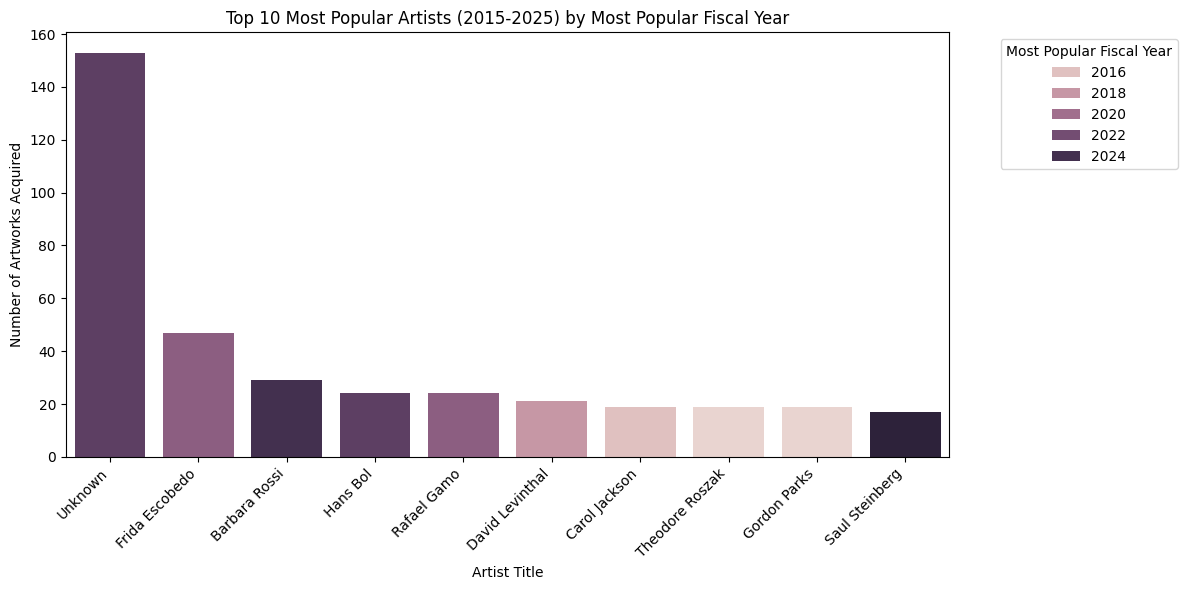

In [ ]:
# Create a bar plot for the most popular artists and their most popular fiscal year
plt.figure(figsize=(12, 6))
sns.barplot(x='artist_title', y='count', hue='most_popular_fiscal_year', data=most_popular_artists.head(10))
plt.title('Top 10 Most Popular Artists (2015-2025) by Most Popular Fiscal Year')
plt.xlabel('Artist Title')
plt.ylabel('Number of Artworks Acquired')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Most Popular Fiscal Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Further, I want to know if there's any growing trend of acquisition on certain artists' pieces. This means whether certain artists' works have been acquired more and more throughout the past 10 years. For now I'm looking the most popular artist for AIC in the past 10 years.

In [ ]:
# Get the name of the artist at index 1 (the second most popular)
second_most_popular_name = most_popular_artists.loc[1, 'artist_title']

print(f"--- Analyzing the second most popular artist: {second_most_popular_name} ---")

# Filter the recent_artworks DataFrame for artworks by that artist
second_artworks = recent_artworks[recent_artworks['artist_title'] == second_most_popular_name]

# Get the count of artworks per fiscal year for this artist
second_fiscal_year_counts = second_artworks['fiscal_year'].value_counts()

print(second_fiscal_year_counts)

--- Analyzing the second most popular artist: Frida Escobedo ---
fiscal_year
2021.0    47
Name: count, dtype: int64


There doesn't seem to be a consistent trend above.  
Now I want to look at whether there is a trend for the second most popular artist.

In [ ]:
# Get the name of the artist at index 2 (the third most popular)
third_most_popular_name = most_popular_artists.loc[2, 'artist_title']

print(f"--- Analyzing the third most popular artist: {third_most_popular_name} ---")

# Filter the recent_artworks DataFrame for artworks by that artist
third_artworks = recent_artworks[recent_artworks['artist_title'] == third_most_popular_name]

# Get the count of artworks per fiscal year for this artist
third_fiscal_year_counts = third_artworks['fiscal_year'].value_counts()

print(third_fiscal_year_counts)

--- Analyzing the third most popular artist: Barbara Rossi ---
fiscal_year
2024.0    17
2022.0     9
2023.0     3
Name: count, dtype: int64


The amount of artwork acquired by the museum almost seem random. It seems there would be big chunks of art being acquired at random times. This means the museum either was in negotiations to buy these artworks in bulk or they were donated.

## 4. Date classification

In [ ]:
# To understand whether an item is truly dated or undated, I want to engineer a new variable called "duration"

# Calculate the duration of time the art was made
aw['duration'] = aw['date_end'] - aw['date_start']

# Display the first few rows with the new 'duration' column
display(aw[['title', 'date_start', 'date_end', 'duration']].head())

,title,date_start,date_end,duration
0,Comfort to the Corns,1800.0,1800.0,0.0
1,The Consultation or Last Hope,1808.0,1808.0,0.0
2,Sons of Neptune Shaving a Landsman!,1817.0,1817.0,0.0
3,The Logierian System,1818.0,1818.0,0.0
4,The Cow-Pock- or- The Wonderful Effects of the...,1802.0,1802.0,0.0


In [ ]:
aw.duration.describe()

,duration
count,9788.000000
mean,19.639150
std,55.796895
min,0.000000
25%,0.000000
50%,0.000000
75%,10.000000
max,900.000000


The median duration is 0 year, indicating that at least half of the artworks in the dataset were completed in the same year they were started (e.g., date_start = 1950, date_end = 1950). This suggests that most records represent artworks with single-year creation dates rather than extended production periods.   
However, the mean duration is higher due to extreme outliers, as shown by the very large maximum value. This discrepancy between the mean and median indicates a highly skewed distribution, where a small number of artworks with unusually long recorded durations inflate the average, making the mean an unreliable measure of central tendency for this variable.

Saved 'duration_boxplot.png'


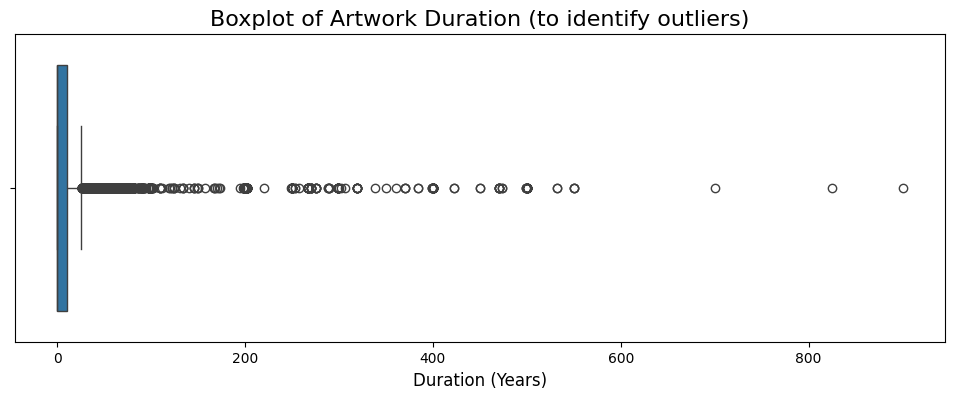

In [ ]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=aw['duration'])
plt.title('Boxplot of Artwork Duration (to identify outliers)', fontsize=16)
plt.xlabel('Duration (Years)', fontsize=12)
plt.savefig('duration_boxplot.png')
print("Saved 'duration_boxplot.png'")

The high average is simply a statistical skew caused by a small number of 'long-duration' outliers (like antiquities or artworks dated to a century).  
I want to specifically check the duration of artworks with date_start year<1500, as their date might be documented less precisely.

In [ ]:
check_aw_antiquities_duration = aw[aw['date_start'] < 1500]
check_aw_antiquities_duration['duration'].describe()

,duration
count,554.000000
mean,147.916968
std,157.006733
min,0.000000
25%,13.000000
50%,99.000000
75%,202.000000
max,900.000000


Saved 'antiquities_duration_boxplot.png'


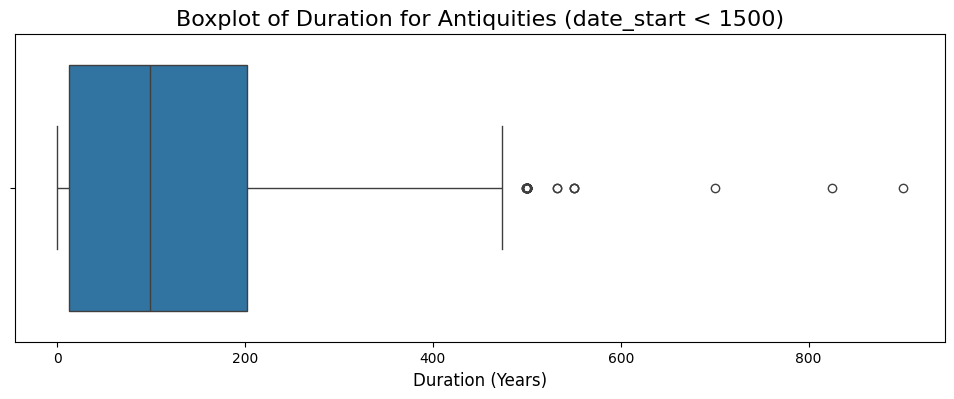

In [ ]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=check_aw_antiquities_duration['duration'])
plt.title('Boxplot of Duration for Antiquities (date_start < 1500)', fontsize=16)
plt.xlabel('Duration (Years)', fontsize=12)
plt.savefig('antiquities_duration_boxplot.png')
print("Saved 'antiquities_duration_boxplot.png'")

Saved 'modern_duration_boxplot.png'


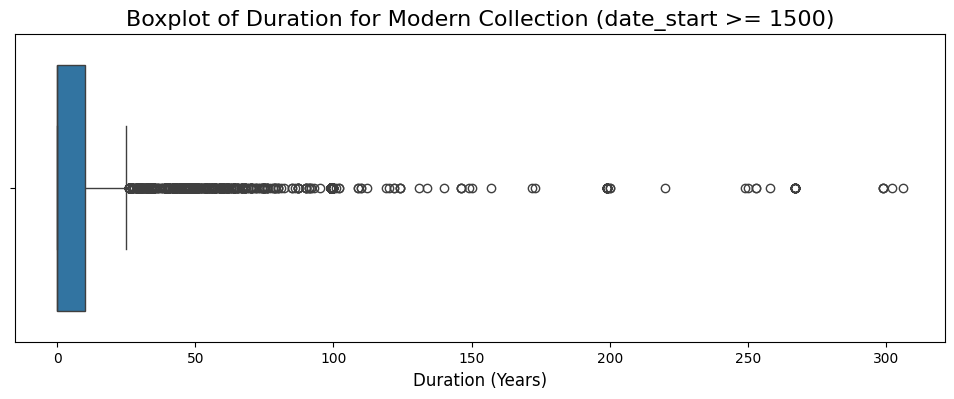

In [ ]:
modern_df = aw[aw['date_start'] >= 1500]

plt.figure(figsize=(12, 4))
sns.boxplot(x=modern_df['duration'])
plt.title('Boxplot of Duration for Modern Collection (date_start >= 1500)', fontsize=16)
plt.xlabel('Duration (Years)', fontsize=12)
plt.savefig('modern_duration_boxplot.png')
print("Saved 'modern_duration_boxplot.png'")

The Modern Collection plot (image_b1ce24.png) shows its "box" is completely squashed at zero. This visually proves that the vast majority of modern artworks are "precisely dated" to a single year or a very short period.

In stark contrast, the Antiquities plot (image_b1ce21.png) has a very wide "box". This confirms that antiquities are, by default, "roughly dated" and are typically assigned to a broad period or range, resulting in a long duration.

Here we want to look at whether dating the items is correlated with other variables. We are engineering new variables based on their the duration of the art made.

0 years = dated

0-10 years = date_to_period

11 - 99 years = date_to_century

100 years onward = undated

In [ ]:
# Define the bins and labels for date classification based on duration
date_bins = [-float('inf'), 0, 10, 99, float('inf')]
date_labels = ['dated', 'dated_to_period', 'dated_to_century', 'undated']

# Create the new 'date_classification' column using pd.cut
aw['date_classification'] = pd.cut(aw['duration'], bins=date_bins, labels=date_labels, right=True)

# Display the value counts of the new column to verify the classification
print("Value counts for the new 'date_classification' column:")
display(aw['date_classification'].value_counts())

# Display the first few rows with the new column for inspection
display(aw[['title', 'date_start', 'date_end', 'duration', 'date_classification']].head())

Value counts for the new 'date_classification' column:


,count
date_classification,
dated,5283
dated_to_period,2192
dated_to_century,1971
undated,342


,title,date_start,date_end,duration,date_classification
0,Comfort to the Corns,1800.0,1800.0,0.0,dated
1,The Consultation or Last Hope,1808.0,1808.0,0.0,dated
2,Sons of Neptune Shaving a Landsman!,1817.0,1817.0,0.0,dated
3,The Logierian System,1818.0,1818.0,0.0,dated
4,The Cow-Pock- or- The Wonderful Effects of the...,1802.0,1802.0,0.0,dated


On View Ratio by Date Classification:


,date_classification,on_view_ratio
0,dated,0.028961
1,dated_to_period,0.065237
2,dated_to_century,0.071030
3,undated,0.029240


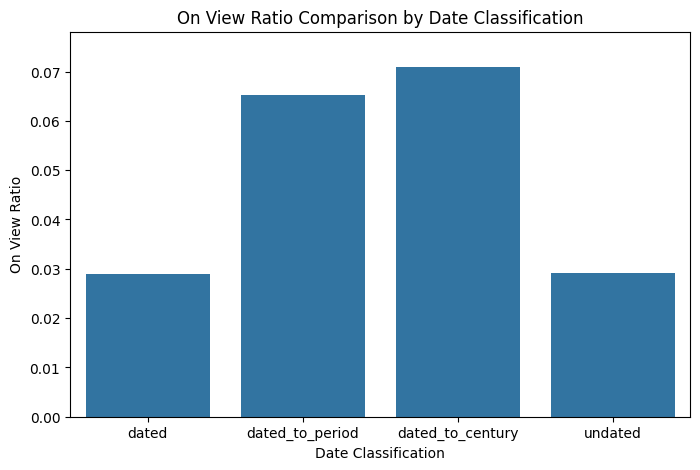

In [ ]:
# Calculate the on_view_ratio for each date_classification
on_view_comparison = aw.groupby('date_classification', observed=False)['is_on_view'].mean().reset_index()
on_view_comparison.columns = ['date_classification', 'on_view_ratio']

print("On View Ratio by Date Classification:")
display(on_view_comparison)

# Define the labels in the desired order for plotting
date_labels = ['dated', 'dated_to_period', 'dated_to_century', 'undated']

# Create a bar plot to visualize the on_view_ratio comparison
plt.figure(figsize=(8, 5))
sns.barplot(x='date_classification', y='on_view_ratio', data=on_view_comparison, order=date_labels) # Use defined order
plt.title('On View Ratio Comparison by Date Classification')
plt.xlabel('Date Classification')
plt.ylabel('On View Ratio')
plt.ylim(0, on_view_comparison['on_view_ratio'].max() * 1.1) # Set y-limit slightly above max ratio
plt.show()

In [ ]:
# Group by date_classification and get the value counts of medium_display for each group
material_by_date_classification = aw.groupby('date_classification', observed=False)['classification_title'].value_counts().reset_index(name='count')

# For each date_classification, find the medium_display with the highest count
most_popular_material_per_date = material_by_date_classification.loc[material_by_date_classification.groupby('date_classification', observed=False)['count'].idxmax()]

print("Most popular material for each date classification:")
display(most_popular_material_per_date)

Most popular material for each date classification:


,date_classification,classification_title,count
0,dated,lithograph,737
312,dated_to_period,woodblock print,237
624,dated_to_century,textile,405
936,undated,textile,41


In [ ]:
# Group by date_classification and get the value counts of classification_title for each group
material_by_date_classification = aw.groupby('date_classification', observed=False)['classification_title'].value_counts().reset_index(name='count')

# For each date_classification, find the classification_title with the highest count
most_popular_classification_per_date = material_by_date_classification.loc[material_by_date_classification.groupby('date_classification', observed=False)['count'].idxmax()]

# Calculate the on_view_ratio for each classification_title
classification_on_view_ratio = aw.groupby('classification_title', observed=False)['is_on_view'].mean().reset_index(name='classification_on_view_ratio')

# Merge the most_popular_classification_per_date with the classification_on_view_ratio
most_popular_classification_with_on_view = pd.merge(most_popular_classification_per_date, classification_on_view_ratio, on='classification_title', how='left')

print("Most popular classification title and its on-view ratio for each date classification:")
display(most_popular_classification_with_on_view)

Most popular classification title and its on-view ratio for each date classification:


,date_classification,classification_title,count,classification_on_view_ratio
0,dated,lithograph,737,0.017943
1,dated_to_period,woodblock print,237,0.001335
2,dated_to_century,textile,405,0.019310
3,undated,textile,41,0.019310


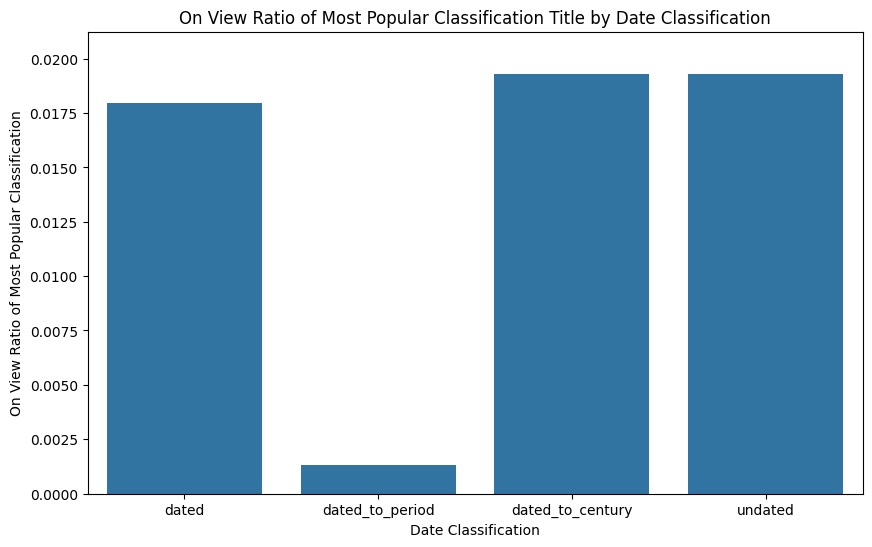

In [ ]:
# Create a bar chart to visualize the on-view ratio of the most popular classification title for each date classification
plt.figure(figsize=(10, 6))
sns.barplot(x='date_classification', y='classification_on_view_ratio', data=most_popular_classification_with_on_view)
plt.title('On View Ratio of Most Popular Classification Title by Date Classification')
plt.xlabel('Date Classification')
plt.ylabel('On View Ratio of Most Popular Classification')
plt.ylim(0, most_popular_classification_with_on_view['classification_on_view_ratio'].max() * 1.1)
plt.show()


We have ran the analysis multiple times and due to the constant change of different exhibitions, the items on view changed dramatically, changing the on view ratio as well. At this point we find there is no correlation between the precision of the date that the item is made versus any other variables.

The other variables we have checked include artwork_type_title, gallery_title, place_of_origin, medium_display, artist_title.

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# We'll fill NaN 'colorfulness' with the median (a robust choice)
median_color = aw['colorfulness'].median()
aw['colorfulness'] = aw['colorfulness'].fillna(median_color)

# We must reshape the data for sklearn
color_data = aw['colorfulness'].values.reshape(-1, 1)

# --- 2. Normalization (Min-Max Scaling to 0-1) ---
min_max_scaler = MinMaxScaler()
aw['colorfulness_norm'] = min_max_scaler.fit_transform(color_data)

# --- 4. Look at the results ---
print("Original colorfulness stats:")
print(aw['colorfulness'].describe())

print("\nNormalized (0-1 scale) stats:")
print(aw['colorfulness_norm'].describe())


Original colorfulness stats:
count    10000.000000
mean        19.606518
std         17.286347
min          0.000000
25%          8.099725
50%         16.141200
75%         27.080650
max        153.572600
Name: colorfulness, dtype: float64

Normalized (0-1 scale) stats:
count    10000.000000
mean         0.127669
std          0.112561
min          0.000000
25%          0.052742
50%          0.105105
75%          0.176338
max          1.000000
Name: colorfulness_norm, dtype: float64


Saved 'colorfulness_norm_by_all_depts.png'


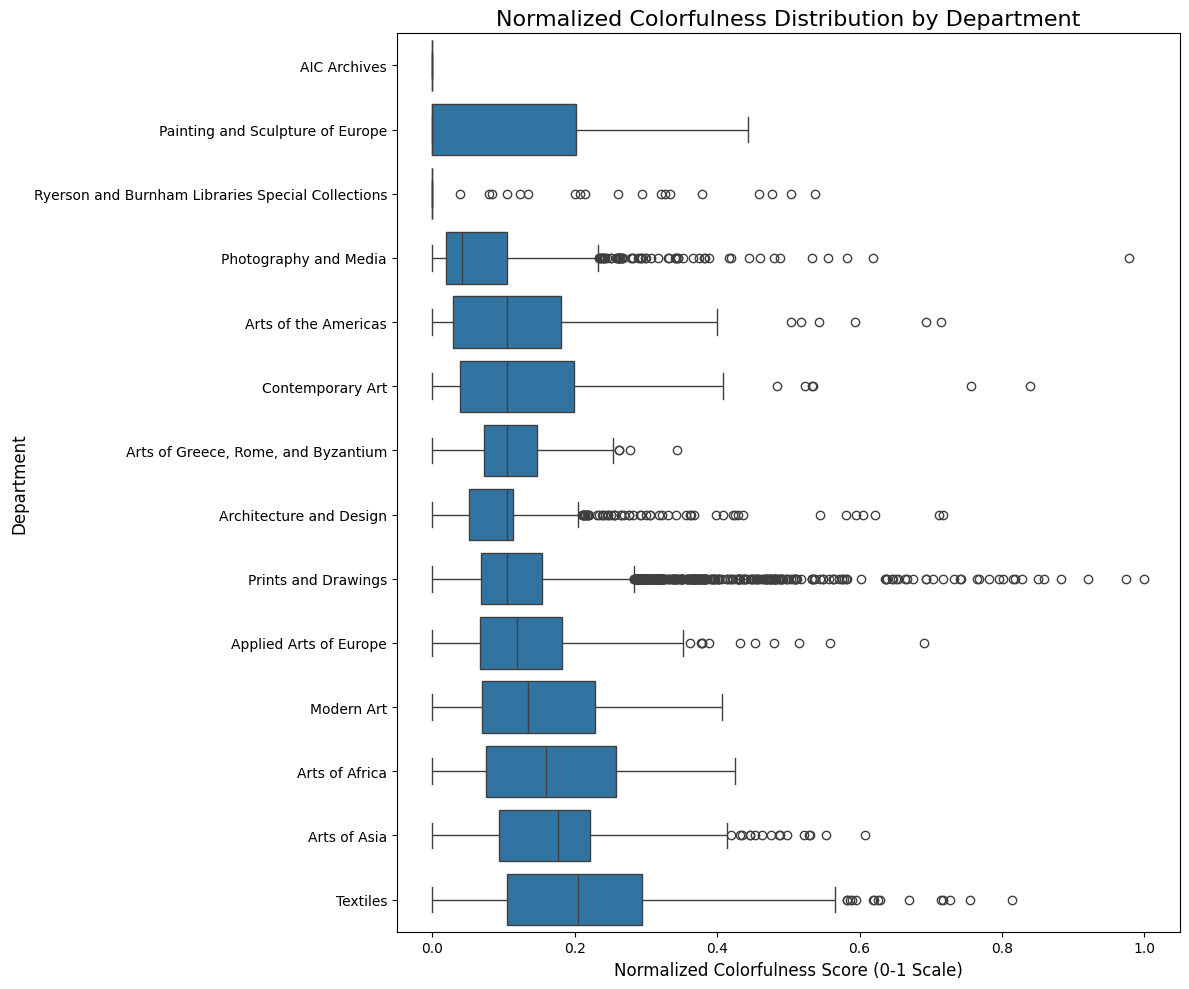

In [ ]:
# Calculate the median normalized colorfulness for each department
median_norm_color_by_dept = aw.groupby('department_title')['colorfulness_norm'].median()

# Sort the departments by this median value (ascending)
ordered_dept_list = median_norm_color_by_dept.sort_values().index

# Adjust figsize height based on the number of departments
# This makes sure all department labels are readable
num_depts = len(ordered_dept_list)
plot_height = max(8, num_depts * 0.5 + 3) # 0.5 inches per dept, min 8

plt.figure(figsize=(12, plot_height))

sns.boxplot(
    data=aw,
    x='colorfulness_norm',
    y='department_title',
    order=ordered_dept_list  # Use the sorted list
)

plt.title('Normalized Colorfulness Distribution by Department', fontsize=16)
plt.xlabel('Normalized Colorfulness Score (0-1 Scale)', fontsize=12)
plt.ylabel('Department', fontsize=12)

plt.tight_layout() # Adjust plot to prevent label overlap
plt.savefig('colorfulness_norm_by_all_depts.png')
print("Saved 'colorfulness_norm_by_all_depts.png'")

The departments with the lowest median colorfulness are AIC Archives, Ryerson and Burnham Libraries Special Collections, Architecture and Design, and Prints and Drawings. This makes perfect sense, as these collections are dominated by paper-based, monochrome items like books, architectural sketches, and prints (which are often black and white).   
The Contemporary Art and Arts of Africa departments show the highest median colorfulness and the widest "boxes" (interquartile ranges). This indicates that these collections are, on average, the most colorful and also have the greatest variety in their colorfulness, likely due to modern pigments and vibrant textiles.